In [84]:
from google.colab import files
import pandas as pd
import io

upload_files = files.upload()

file_name = next(iter(upload_files))

df = pd.read_csv(io.StringIO(upload_files[file_name].decode('utf-8')), header=1, delimiter=";")

df

Saving default of credit card clients.csv to default of credit card clients (7).csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [85]:
df = df.drop('ID', axis = 1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [86]:
print(df["EDUCATION"].unique())

[2 1 3 5 4 6 0]


In [87]:
# Combine EDUCATION values 0, 5 and 6 into 4
# This was done because documentation says that the column can only take 4 values (1 = graduate school; 2 = university; 3 = high school; 4 = others).
df["EDUCATION"] = df["EDUCATION"].replace([0, 5, 6], 4)
df["EDUCATION"].unique()

array([2, 1, 3, 4])

In [88]:
print(df["MARRIAGE"].unique())

[1 2 3 0]


In [89]:
# Combining MARRIAGE column "0" values to 3
# The documentation says the column can only take 3 values: (1 = married; 2 = single; 3 = others). 0 is neither of those.
df["MARRIAGE"] = df["MARRIAGE"].replace(0, 3)
df["MARRIAGE"].unique()

array([1, 2, 3])

In [90]:
print(df["SEX"].unique())

[2 1]


In [91]:
# Encoding SEX column:
df['SEX'] = df['SEX'] - 1
print(df["SEX"].unique())
# 0 = male, 1 = female

[1 0]


In [92]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [120]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, max_depth=10, ccp_alpha=0.001, max_features='sqrt')
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       random_state=42)

In [121]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8056666666666666
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4687
           1       0.60      0.34      0.43      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.81      0.78      6000

[[4391  296]
 [ 870  443]]


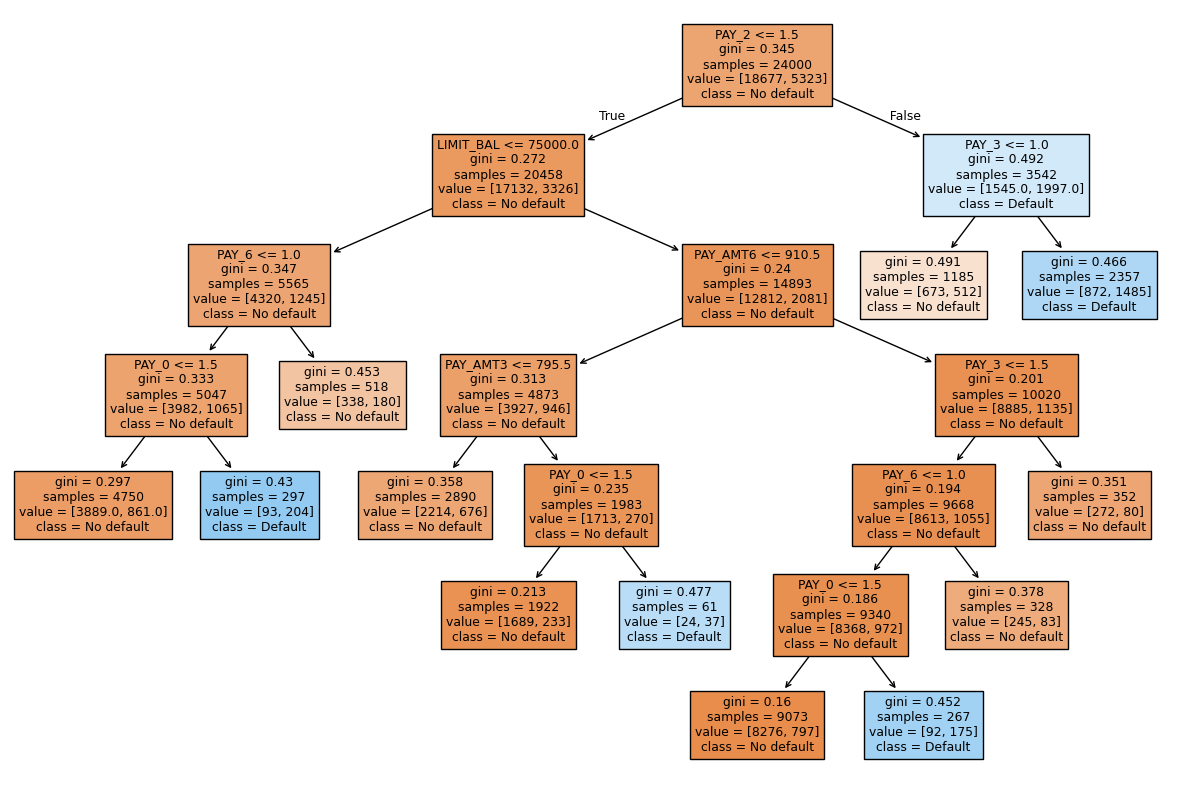

In [122]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['No default', 'Default'])
plt.show()